In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Вспомогательные функции

In [3]:
# Плотность источников тепла
def func(s, t):
    #return 0.
    return s + t * 4.
    
# Температура внешней среды
def p(t):
    return math.cos(2 * t * math.pi)
    #return t    

def array(f, numval, numdh):
    """Создать N-мерный массив.
    
    param: f - функция, которая приминает N аргументов.
    param: numval - диапазоны значений параметров функции. Список
    param: numdh - шаги для параметров. Список
    
    """
    def rec_for(f, numdim, numdh, current_l, l_i, arr):
        """Рекурсивный цикл.
        
        param: f - функция, которая приминает N аргументов.
        param: numdim - размерность выходной матрицы. Список
        param: numdh - шаги для параметров. Список
        param: current_l - текущая глубина рекурсии.
        param: l_i - промежуточный список индексов. Список
        param: arr - матрица, с которой мы работаем. np.array
        
        """
        for i in range(numdim[current_l]):
            l_i.append(i)
            if current_l < len(numdim) - 1:
                rec_for(f, numdim, numdh, current_l + 1, l_i, arr)
            else:
                args = (np.array(l_i) * np.array(numdh))
                arr[tuple(l_i)] = f(*args)
            l_i.pop()
        return arr
    numdim = [int(numval[i] / numdh[i]) + 1 for i in range(len(numdh))]
    arr = np.zeros(numdim)
    arr = rec_for(f, numdim, numdh, 0, [], arr)
    # Надо отобразить так x - j, y - i (для графиков), поэтому используем transpose
    arr = np.transpose(arr)
    return arr

def TDMA(a, b, c, f):
    """Метод прогонки.
    
    param: a - левая поддиагональ. 
    param: b - правая поддиагональ.
    param: c - центр.
    param: f - правая часть.
    """
    #a, b, c, f = map(lambda k_list: map(float, k_list), (a, b, c, f))
    
    alpha = [0]
    beta = [0]
    n = len(f)
    x = [0] * n

    for i in range(n - 1):
        alpha.append(-b[i] / (a[i] * alpha[i] + c[i]))
        beta.append((f[i] - a[i] * beta[i]) / (a[i] * alpha[i] + c[i]))

    x[n - 1] = (f[n - 1] - a[n - 1] * beta[n - 1]) / (c[n - 1] + a[n - 1] * alpha[n - 1])

    for i in reversed(range(n - 1)):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]

    return x

---
# Тест для метода прогонки
source: [http://old.exponenta.ru/educat/class/courses/vvm/theme_5/example.asp](http://old.exponenta.ru/educat/class/courses/vvm/theme_5/example.asp)
```
Ответ: (-3, 1, 5, -8)
```

In [4]:
a = [0, 1, 1, 1]
c = [2, 10, -5, 4]
b = [1, -5, 2, 0]
f = [-5, -18, -40, -27]
x = TDMA(a, b, c, f)
x

[-3.0, 0.9999999999999998, 5.0, -8.0]

---
source: [http://kontromat.ru/?page_id=4980](http://kontromat.ru/?page_id=4980) (Ответ там неверный, знак минус у 5 пропущен)
```
Ответ: (-10, 5, -2, -10)
```

In [5]:
a = [0, -3, -5, -6, -5]
c = [2, 8, 12, 18, 10]
b = [-1, -1, 2, -4, 0]
f = [-25, 72, -69, -156, 20]
x = TDMA(a, b, c, f)
x

[-10.0, 5.0, -2.000000000000001, -9.999999999999998, -2.9999999999999996]

---
# Тесты для создания массивов

In [6]:
X_ = np.arange(0., 1.01, .1)
Y_ = np.arange(0., 2.01, .01)
#print(np.shape(X_))
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(201, 11) (201, 11)


In [7]:
X_

array([[ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       ..., 
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ]])

In [8]:
Y_

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.02,  0.02,  0.02, ...,  0.02,  0.02,  0.02],
       ..., 
       [ 1.98,  1.98,  1.98, ...,  1.98,  1.98,  1.98],
       [ 1.99,  1.99,  1.99, ...,  1.99,  1.99,  1.99],
       [ 2.  ,  2.  ,  2.  , ...,  2.  ,  2.  ,  2.  ]])

In [9]:
arr = array(func, [1., 2.], [.1, .01])
print(np.shape(arr))
arr

(201, 11)


array([[ 0.  ,  0.1 ,  0.2 , ...,  0.8 ,  0.9 ,  1.  ],
       [ 0.04,  0.14,  0.24, ...,  0.84,  0.94,  1.04],
       [ 0.08,  0.18,  0.28, ...,  0.88,  0.98,  1.08],
       ..., 
       [ 7.92,  8.02,  8.12, ...,  8.72,  8.82,  8.92],
       [ 7.96,  8.06,  8.16, ...,  8.76,  8.86,  8.96],
       [ 8.  ,  8.1 ,  8.2 , ...,  8.8 ,  8.9 ,  9.  ]])

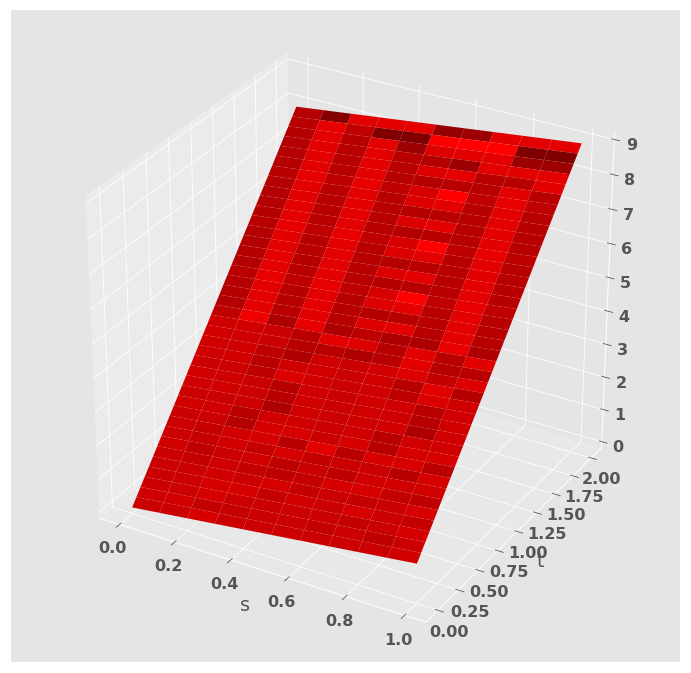

In [10]:
Z = arr

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_, Y_, Z, color='r')
plt.xlabel('s')
plt.ylabel('t')

plt.show()

In [11]:
arr = array(p, [1.], [.001])
arr

array([ 1.        ,  0.99998026,  0.99992104, ...,  0.99992104,
        0.99998026,  1.        ])

---
# Создание класса модели
```
Ссылки:
```
[Трехточечные производные](https://studopedia.ru/9_85271_vichislenie-pervih-proizvodnih-po-trehtochechnim-shemam.html)

In [12]:
# Класс модели для Л.Р №1
class Lab1OptCtrlModel():
    
    def __init__(self, p_d):
        self.a, self.l, self.v, self.T = p_d['a'], p_d['l'], p_d['v'], p_d['T']
        self.p, self.f = p_d['p(t)'], p_d['f(s, t)']
        self.p_min, self.p_max, self.R = p_d['p_min'], p_d['p_max'], p_d['R']
        self.fi, self.y  = p_d['fi(s)'], p_d['y(s)']
        
        self.dh, self.dt = p_d['dh'], p_d['dt']
        self.N, self.M = p_d['N'], p_d['M']
        
        self.p_arr = []
        self.p_arr.append(array(self.p, [p_d['T']], [p_d['dt']]))
        
        self.f_arr = array(f, [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']])
        
        self.x_arr = []
        self.x_arr.append(array(self.f, [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']]))
        self.x_arr[0][0,:] = array(self.fi, [p_d['l']], [p_d['dh']])
        
    def Solve(self, eps=10**-5):
        
        # Число уравнений
        eq_l = self.N - 1
        
        # Инициализация элементов для метода прогонки, которые постоянны
        a, b, c = [0. for i in range(eq_l)], [0. for i in range(eq_l)], [0. for i in range(eq_l)]
        f = [0. for i in range(eq_l)]
        
        a2_dt_dh2 = self.a ** 2 * self.dt / self.dh ** 2
        buf = 1. / (3. + 2. * self.dh * self.v)
        
        # a
        a[1:-1] = [a2_dt_dh2 for i in range(1, eq_l - 1)]
        # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
        a[-1] = a2_dt_dh2 * (1. - buf)
        
        # b
        # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
        b[0] = 2. / 3. * a2_dt_dh2
        b[1:-1] = [a2_dt_dh2 for i in range(1, eq_l - 1)]
        
        # c
        # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
        c[0] = -2. / 3. * a2_dt_dh2 - 1.
        c[1:-1] = [-1. - 2. * a2_dt_dh2 for i in range(1, eq_l - 1)]
        # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
        c[-1] = -1. + a2_dt_dh2 * (4. * buf - 2.)
        
        ind = 0
        # Решаем 1 задачу
        for j in range(0, self.M):
            
            # f
            f[0:-1] = [-self.x_arr[ind][j, i] - self.dt * self.f_arr[j, i] for i in range(1, eq_l)]
            # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
            f[-1] = -self.x_arr[ind][j, -2] - self.dt * self.f_arr[j, -2]
            f[-1] += -a2_dt_dh2 * 2. * self.dh * self.v * buf * self.p_arr[ind][j + 1]
            
            # Решаем задачу
            
            self.x_arr[ind][j + 1,1:1 + eq_l] = TDMA(a, b, c, f)
                
            # Вычисляем первый и последний элементы
            # Эта часть зависит от апроксимации, которую мы используем, поэтому стоит ввести функцию
            self.x_arr[ind][j + 1, 0] = 4. / 3. * self.x_arr[ind][j + 1, 1] - 1. / 3. * self.x_arr[ind][j + 1, 2]
            self.x_arr[ind][j + 1, -1] = 4 * buf * self.x_arr[ind][j + 1, -2]
            self.x_arr[ind][j + 1, -1] -= buf * self.x_arr[ind][j + 1, -3]
            self.x_arr[ind][j + 1, -1] += 2. * self.dh * self.v * buf * self.p_arr[ind][j + 1]
            
        return self.x_arr[ind]

---
# Тесты для 1 задачи

In [13]:
# Словарь параметров
p_d = {}

# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 10., 3., 4., 20.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2)
    
# Температура внешней среды
def p(t):
    return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -10., 10., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    return s

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
p_d['N'], p_d['M'] = 10, 100

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(3.0, 20.0, 0.3, 0.2)

In [14]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(101, 11) (101, 11)


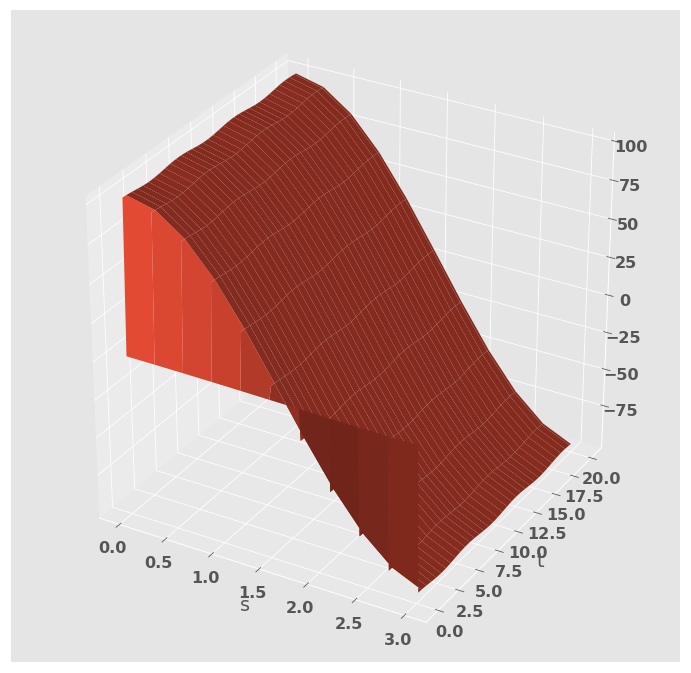

In [15]:
model = Lab1OptCtrlModel(p_d)
Z = model.x_arr[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_, Y_, Z)
plt.xlabel('s')
plt.ylabel('t')

plt.show()

In [16]:
x_arr = model.Solve()

In [17]:
x_arr_1 = array(x, [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']])

In [18]:
abs(x_arr - x_arr_1)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.28502782e-03,   1.61829413e-03,   6.07751447e-04, ...,
          6.04184526e-04,   7.31332131e-05,   1.35321293e-03],
       [  2.59705300e-03,   9.33989131e-04,   6.55440595e-05, ...,
          2.73871274e-04,   3.00371578e-04,   1.46036852e-03],
       ..., 
       [  9.93287288e-04,   6.56137861e-04,   1.61475490e-03, ...,
          4.52838212e-04,   7.92897075e-04,   1.69062639e-03],
       [  1.79213119e-04,   1.46319565e-03,   2.40076353e-03, ...,
          8.19190348e-04,   1.04081666e-03,   1.80642754e-03],
       [  4.89550934e-04,   2.12617760e-03,   3.04639918e-03, ...,
          1.11961365e-03,   1.24403643e-03,   1.90132676e-03]])

In [19]:
np.max(abs(x_arr - x_arr_1))

0.0090386719787788755

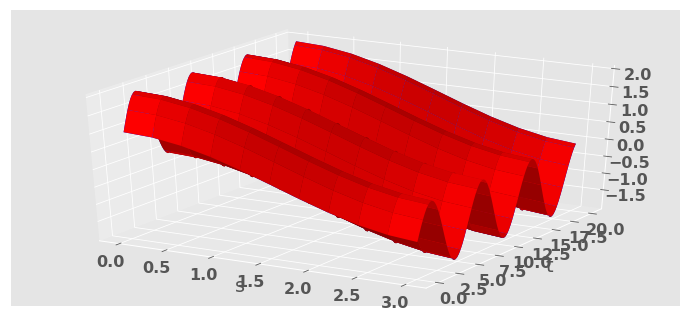

In [20]:
Z = x_arr_1

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='b')
Z = x_arr
ax.plot_surface(X_, Y_, Z, color='r')
plt.xlabel('s')
plt.ylabel('t')

plt.show()

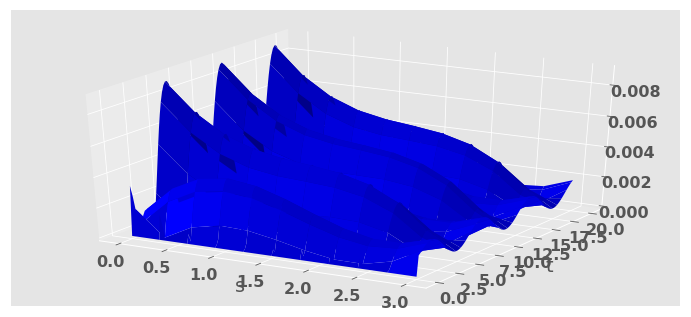

In [21]:
Z = abs(x_arr - x_arr_1)

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='b')
plt.xlabel('s')
plt.ylabel('t')

plt.show()